# Crop Yield Prediction
### Md. Rubel Rana 1712661642
### Navid Al - Musabbir 1721853042

In [1]:
import graphviz
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats
import autosklearn.regression
import autogluon.core as ag
from tpot import TPOTRegressor

from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

import autosklearn
import sklearn.metrics

from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

from autosklearn.classification import AutoSklearnClassifier


from supervised.automl import AutoML
from supervised.preprocessing.eda import EDA

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import accuracy_score


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
# Dataset
dataset = 'dataset/Aman/aman.csv'

In [3]:
# Load dataset into dataframe
data = pd.read_csv(dataset)

## Data Exploration

In [4]:
data.shape

(723, 13)

In [5]:
data.columns

Index(['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT', 'Productions', 'PPH'],
      dtype='object')

In [6]:
data.head()

District    Area  Year   Max_Temp   Min_Temp   Rainfall   Humidity  \
0         2  634460  1969  28.400000  14.233333  10.666667  73.333333   
1         3  497290  1969  29.833330  15.666670  11.333330  74.666670   
2         4  976420  1969  31.300000  17.400000  15.666667  78.333333   
3         5  765390  1969  29.266667  14.600000   6.000000  71.666667   
4         6  888530  1969  28.433333  13.400000  32.666667  76.000000   

       Wind     Cloud  Sunshine  ALT  Productions       PPH  
0  0.533333  1.600000  8.866667   20       280905  0.442747  
1  0.933333  2.533333  8.566667    6       319075  0.641628  
2  0.200000  0.633333  7.241414   10       508305  0.520580  
3  0.500000  1.866667  8.900000    9       312720  0.408576  
4  0.133333  0.666667  6.554667   37       407065  0.458133

In [7]:
data.tail()

District    Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity  Wind  \
718        14  117370  2013     30.65     14.45       0.0      79.0  2.05   
719        15   24542  2013     31.20     16.15       0.0      82.0  1.10   
720        16  384166  2013     29.55     15.00       0.0      79.0  1.90   
721        17  351171  2013     31.60     16.00       0.0      75.0  2.30   
722        18  318362  2013     31.65     14.70       1.0      79.5  1.50   

     Cloud  Sunshine  ALT  Productions       PPH  
718   0.65      6.35   20       130571  1.112473  
719   1.45      7.70   63        29846  1.216119  
720   1.05      5.65   34       470034  1.223518  
721   1.65      7.45   35       393509  1.120562  
722   0.70      6.55   10       285629  0.897183

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     723 non-null    int64  
 1   Area         723 non-null    int64  
 2   Year         723 non-null    int64  
 3   Max_Temp     723 non-null    float64
 4   Min_Temp     723 non-null    float64
 5   Rainfall     723 non-null    float64
 6   Humidity     723 non-null    float64
 7   Wind         723 non-null    float64
 8   Cloud        723 non-null    float64
 9   Sunshine     723 non-null    float64
 10  ALT          723 non-null    int64  
 11  Productions  723 non-null    int64  
 12  PPH          723 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 73.6 KB


In [9]:
data.describe()

District          Area         Year    Max_Temp    Min_Temp  \
count  723.000000  7.230000e+02   723.000000  723.000000  723.000000   
mean     9.279391  6.592499e+05  1991.933610   29.837834   14.873554   
std      5.181146  3.304278e+05    12.711306    1.011809    1.345086   
min      1.000000  1.554000e+04  1969.000000   26.833333   11.666667   
25%      5.000000  4.303660e+05  1981.000000   29.166667   13.883333   
50%      9.000000  6.526100e+05  1992.000000   29.866667   14.800000   
75%     14.000000  9.100200e+05  2003.000000   30.533333   15.866667   
max     18.000000  1.560020e+06  2013.000000   34.266667   18.933333   

         Rainfall    Humidity        Wind       Cloud    Sunshine         ALT  \
count  723.000000  723.000000  723.000000  723.000000  723.000000  723.000000   
mean    15.530421   77.339465    0.804828    1.322581    7.262482   16.919779   
std     17.244507    4.217665    0.640335    0.433096    0.931467   15.212682   
min      0.000000   64.333333    0.033333    0.366667    2.366667    3.000000   
25%      2.666667   74.333333    0.400000    1.033333    6.800000    6.000000   
50%     10.333330   77.666667    0.633333    1.266667    7.306897   10.000000   
75%     23.000000   80.333333    0.966667    1.533333    7.866667   20.000000   
max    107.666700   91.333333    6.000000    3.733333    9.700000   63.000000   

        Productions         PPH  
count  7.230000e+02  723.000000  
mean   4.042846e+05    0.667895  
std    2.162332e+05    0.271216  
min    1.068200e+04    0.048499  
25%    2.472300e+05    0.497801  
50%    3.886050e+05    0.615868  
75%    5.286350e+05    0.814134  
max    1.221120e+06    4.368932

## Data Preprocessing

#### a. Removing 0's and NaN values

In [10]:
# Checking 0 values
(data == 0).sum(axis=0)

District        0
Area            0
Year            0
Max_Temp        0
Min_Temp        0
Rainfall       65
Humidity        0
Wind            0
Cloud           0
Sunshine        0
ALT             0
Productions     0
PPH             0
dtype: int64

In [11]:
# Replace 0's with NaN
data.replace(0, np.nan, inplace=True)

In [12]:
data.isnull().sum().sum()

65

In [13]:
# Drop all NaN values
data = data.dropna()
data = data.reset_index(drop=True)

In [14]:
data.isnull().values.any()

False

In [15]:
# Be ensure about 0's and NaN values
(data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [16]:
data.shape

(658, 13)

In [17]:
data.head()

District    Area  Year   Max_Temp   Min_Temp   Rainfall   Humidity  \
0         2  634460  1969  28.400000  14.233333  10.666667  73.333333   
1         3  497290  1969  29.833330  15.666670  11.333330  74.666670   
2         4  976420  1969  31.300000  17.400000  15.666667  78.333333   
3         5  765390  1969  29.266667  14.600000   6.000000  71.666667   
4         6  888530  1969  28.433333  13.400000  32.666667  76.000000   

       Wind     Cloud  Sunshine  ALT  Productions       PPH  
0  0.533333  1.600000  8.866667   20       280905  0.442747  
1  0.933333  2.533333  8.566667    6       319075  0.641628  
2  0.200000  0.633333  7.241414   10       508305  0.520580  
3  0.500000  1.866667  8.900000    9       312720  0.408576  
4  0.133333  0.666667  6.554667   37       407065  0.458133

In [18]:
data.tail()

District    Area  Year   Max_Temp  Min_Temp   Rainfall   Humidity  \
653        17  384516  2012  30.500000     15.00  16.000000  78.333333   
654        18  321556  2012  29.066667     13.40  31.666667  81.666667   
655         4  347072  2013  32.000000     16.00   1.500000  79.500000   
656         5   39810  2013  31.300000     17.05   2.000000  70.000000   
657        18  318362  2013  31.650000     14.70   1.000000  79.500000   

         Wind     Cloud  Sunshine  ALT  Productions       PPH  
653  2.833333  2.133333  6.533333   35       370015  0.962288  
654  1.900000  1.433333  5.200000   10       266091  0.827511  
655  1.750000  0.750000  7.200000   10       360406  1.038419  
656  1.650000  1.050000  5.550000    9        28302  0.710927  
657  1.500000  0.700000  6.550000   10       285629  0.897183

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     658 non-null    int64  
 1   Area         658 non-null    int64  
 2   Year         658 non-null    int64  
 3   Max_Temp     658 non-null    float64
 4   Min_Temp     658 non-null    float64
 5   Rainfall     658 non-null    float64
 6   Humidity     658 non-null    float64
 7   Wind         658 non-null    float64
 8   Cloud        658 non-null    float64
 9   Sunshine     658 non-null    float64
 10  ALT          658 non-null    int64  
 11  Productions  658 non-null    int64  
 12  PPH          658 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 67.0 KB


#### b. Removing Outliers 

In [20]:
z = np.abs(stats.zscore(data))

In [21]:
np.where(z > 2)

(array([  1,  14,  15,  20,  24,  24,  26,  32,  34,  35,  39,  40,  41,
         43,  45,  47,  48,  48,  49,  50,  51,  52,  54,  58,  59,  60,
         62,  64,  66,  67,  68,  75,  76,  77,  78,  79,  80,  81,  89,
         90,  90,  91,  92,  94,  96,  99, 102, 102, 104, 108, 122, 130,
        137, 140, 145, 145, 145, 145, 146, 146, 153, 155, 161, 161, 161,
        162, 162, 168, 173, 175, 177, 177, 177, 178, 178, 185, 189, 191,
        193, 193, 193, 194, 194, 194, 201, 209, 209, 209, 210, 210, 210,
        217, 224, 224, 225, 225, 229, 240, 240, 241, 241, 243, 243, 247,
        250, 252, 256, 256, 257, 257, 272, 272, 273, 273, 273, 280, 282,
        289, 289, 290, 291, 292, 300, 303, 303, 304, 304, 314, 316, 317,
        320, 320, 320, 321, 321, 327, 327, 337, 338, 338, 346, 350, 352,
        353, 354, 354, 370, 371, 371, 378, 379, 384, 387, 387, 388, 393,
        393, 394, 398, 399, 400, 402, 404, 405, 405, 405, 421, 421, 422,
        422, 423, 423, 423, 424, 424, 425, 426, 427

In [22]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [23]:
(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

District   Area   Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0       False  False  False     False     False     False     False  False   
1       False  False  False     False     False     False     False  False   
2       False  False  False     False     False     False     False  False   
3       False  False  False     False     False     False     False  False   
4       False  False  False     False     False     False     False  False   
..        ...    ...    ...       ...       ...       ...       ...    ...   
653     False  False  False     False     False     False     False   True   
654     False  False  False     False     False     False     False   True   
655     False  False  False     False     False     False     False   True   
656     False  False  False     False     False     False     False  False   
657     False  False  False     False     False     False     False  False   

     Cloud  Sunshine    ALT  Productions    PPH  
0    False     False  False        False  False  
1     True     False  False        False  False  
2    False     False  False        False  False  
3    False     False  False        False  False  
4    False     False  False        False  False  
..     ...       ...    ...          ...    ...  
653  False     False  False        False  False  
654  False      True  False        False  False  
655  False     False  False        False  False  
656  False     False  False        False  False  
657  False     False  False        False  False  

[658 rows x 13 columns]

In [24]:
data.shape

(658, 13)

In [25]:
data = data[(z < 2).all(axis=1)]

In [26]:
data.shape

(446, 13)

## Spliting Data

In [27]:
X = data[['District', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall', 'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = data['PPH']

#### a. Train data & Test data

In [28]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.3)

#### a. Train data & Validation data

In [29]:
X_train, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.3)

## 1. Performing Automating EDA

Considering 7 the most frequent values
Considering 7 the most frequent values
Considering 7 the most frequent values


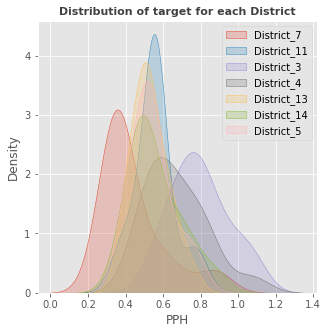

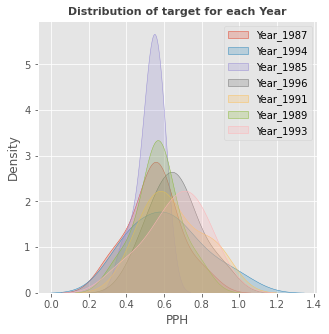

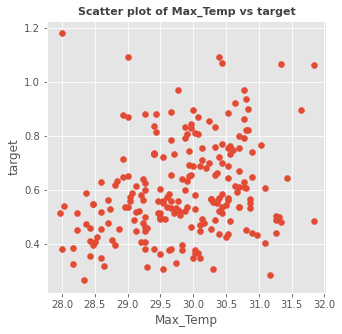

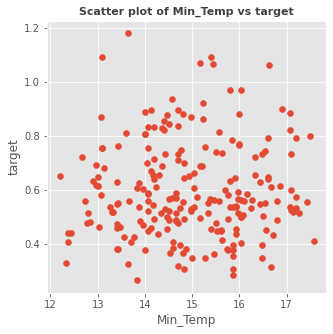

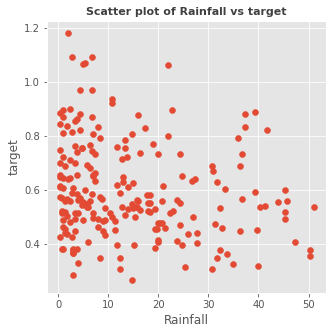

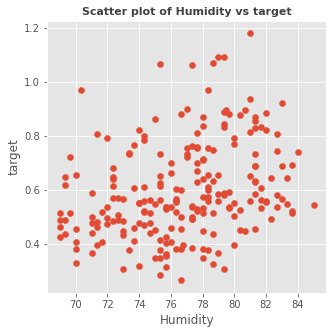

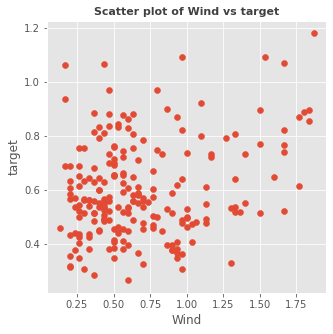

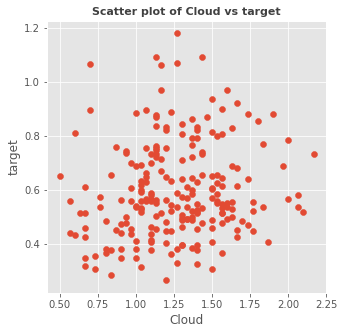

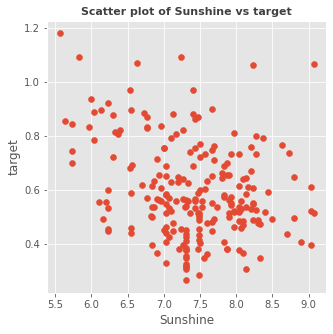

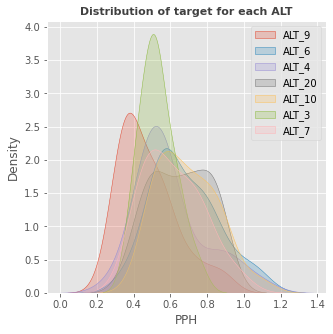

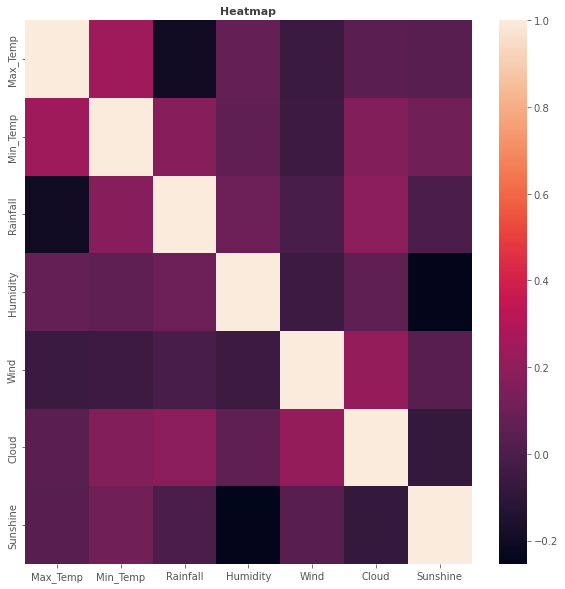

In [30]:
EDA.extensive_eda(X_train,y_valid,save_path="content/mljar-supervised/aman")

## Creating AutoML Models

In [31]:
automl = AutoML(mode='Compete',
                total_time_limit=10,
                results_path="AutoML_classifier/Aman")

In [32]:
automl.fit(X_train, y_valid)

This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [33]:
predictions = automl.predict(X_test)

#### a. RMSE

In [34]:
metrics.mean_squared_error(y_test, predictions)

0.00415002186818289

#### b. MAE

In [35]:
metrics.mean_absolute_error(y_test, predictions)

0.04716580029723376

#### c. R2

In [36]:
metrics.r2_score(y_test, predictions)

0.859564832271416

In [37]:
y_pred = automl.predict(X_train)

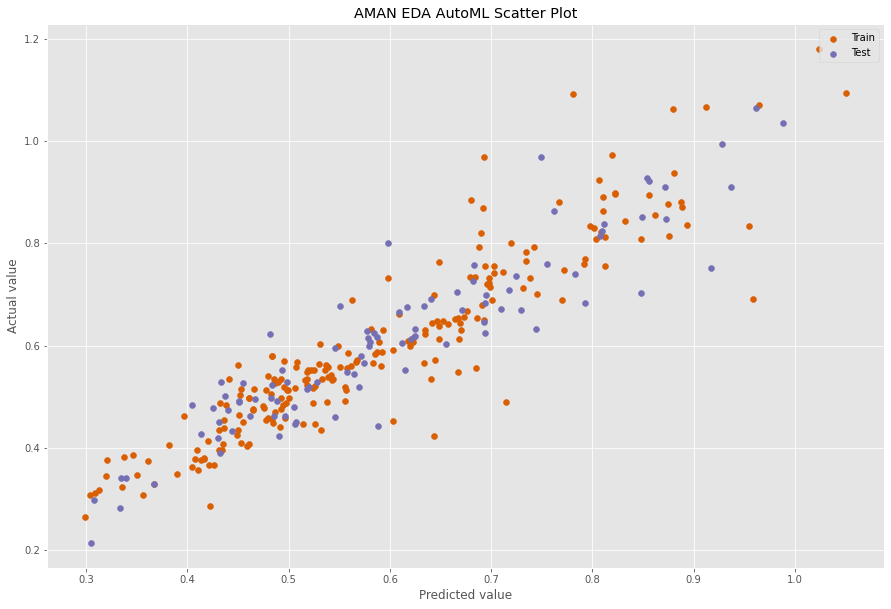

In [38]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('AMAN EDA AutoML Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/aman_automl_scatter.png")
plt.show()

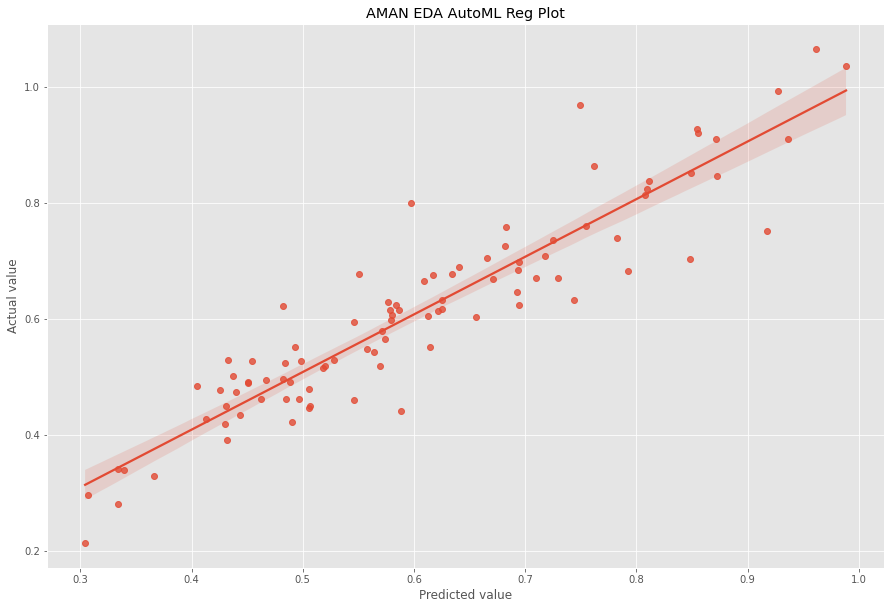

In [39]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('AMAN EDA AutoML Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/aman_eda_automl_reg.png")

## 2. AutoSklearn Regression

In [40]:
autosk = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='autosklearn_regression/aman',
    resampling_strategy='holdout',
    resampling_strategy_arguments={'folds': 5},
)

In [41]:
autosk.fit(X_train, y_valid, dataset_name='data')

AutoSklearnRegressor(per_run_time_limit=30,
                     resampling_strategy_arguments={'folds': 5},
                     time_left_for_this_task=120,
                     tmp_folder='autosklearn_regression/aman')

In [42]:
autosk.leaderboard()

rank  ensemble_weight               type      cost  duration
model_id                                                              
8            1             0.46  gradient_boosting  0.224948  1.274272
14           2             0.38   gaussian_process  0.259175  1.881755
34           3             0.10                mlp  0.375237  0.746511
13           4             0.06        extra_trees  0.441952  1.565055

In [43]:
print(autosk.show_models())

[(0.460000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 952, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'uniform', 'regressor:gradient_boosting:early_stop': 'off', 'regressor:gradient_boosting:l2_regularization': 1.8428972335335263e-10, 'regressor:gradient_boosting:learning_rate': 0.012607824914758717, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gr

In [44]:
predictions = autosk.predict(X_test)

#### a. RMSE

In [45]:
metrics.mean_squared_error(y_test, predictions)

0.005550753947799956

#### b. MAE

In [46]:
metrics.mean_absolute_error(y_test, predictions)

0.05374089081543591

#### c. R2

In [47]:
metrics.r2_score(y_test, predictions)

0.8121645893830665

In [48]:
y_pred = autosk.predict(X_train)

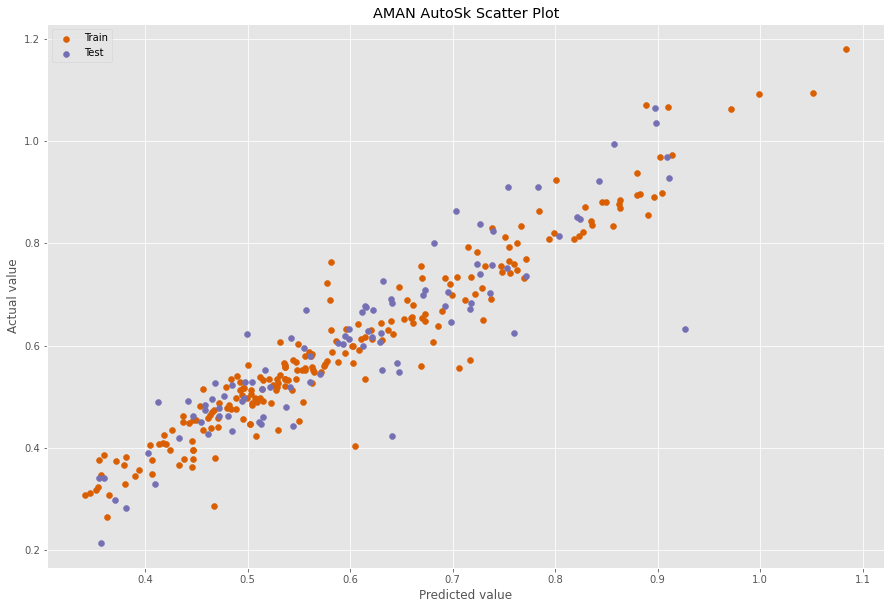

In [49]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('AMAN AutoSk Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/aman_autosk_scatter.png")
plt.show()

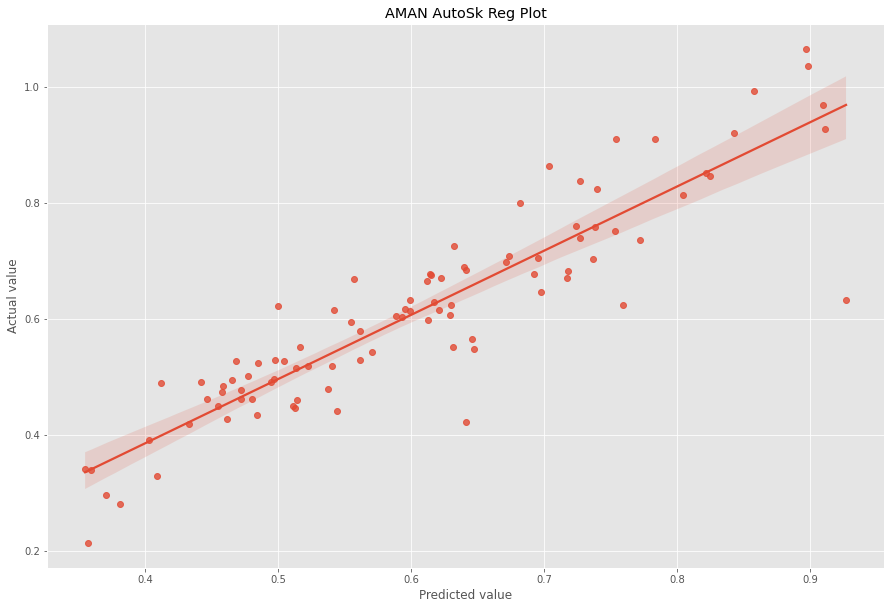

In [50]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('AMAN AutoSk Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/aman_autosk_reg.png")

## 3. AutoGluon

In [51]:
train_data = TabularDataset('dataset/Aman/train_data.csv')

In [52]:
label = 'PPH'

In [53]:
data[label].describe()

count    446.000000
mean       0.611146
std        0.181661
min        0.214389
25%        0.480054
50%        0.569985
75%        0.727435
max        1.180182
Name: PPH, dtype: float64

In [54]:
save_path = 'autogluon/aman'

In [55]:
hyperparameters = {
    'NN': {'num_epochs': 10, 'activation': 'relu', 'dropout_prob': ag.Real(0.0, 0.5)},
    'GBM': {'num_boost_round': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)},
    'XGB': {'n_estimators': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)}
}

In [56]:
predictor = TabularPredictor(label=label, path=save_path).fit(
    train_data, hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto', time_limit=60
)

[WARNING] [2021-09-18 23:33:18,297:autogluon.core.utils.utils] Warning: path already exists! This predictor may overwrite an existing predictor! path="autogluon/aman"
[WARNING] [2021-09-18 23:33:18,298:root] Warning: hyperparameter tuning is currently experimental and may cause the process to hang.


In [57]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.038938       0.051539  3.165828                0.000305           0.276996            2       True         49
1            XGBoost/T6  -0.043563       0.012047  1.129437                0.012047           1.129437            1       True         31
2            XGBoost/T0  -0.051323       0.031886  0.711949                0.031886           0.711949            1       True         25
3           LightGBM/T7  -0.052210       0.003624  0.730152                0.003624           0.730152            1       True          8
4          LightGBM/T14  -0.054235       0.003678  0.317294                0.003678           0.317294            1       True         15
5           LightGBM/T6  -0.054961       0.001750  0.536506                0.001750           0.536506        

AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"


{'model_types': {'LightGBM/T0': 'LGBModel',
  'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'LightGBM/T8': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T14': 'LGBModel',
  'LightGBM/T15': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'LightGBM/T18': 'LGBModel',
  'LightGBM/T19': 'LGBModel',
  'LightGBM/T20': 'LGBModel',
  'LightGBM/T21': 'LGBModel',
  'LightGBM/T22': 'LGBModel',
  'LightGBM/T23': 'LGBModel',
  'XGBoost/T0': 'XGBoostModel',
  'XGBoost/T1': 'XGBoostModel',
  'XGBoost/T2': 'XGBoostModel',
  'XGBoost/T3': 'XGBoostModel',
  'XGBoost/T4': 'XGBoostModel',
  'XGBoost/T5': 'XGBoostModel',
  'XGBoost/T6': 'XGBoostModel',
  'XGBoost/T7': 'XGBoostModel',
  'XGBoost/T8': 'XG

In [58]:
test_data = TabularDataset('dataset/Aman/test_data.csv')

In [59]:
perf = predictor.evaluate(test_data)

In [60]:
y_pred = predictor.predict_proba(test_data)

In [61]:
perf = predictor.evaluate_predictions(y_true=test_data[label], y_pred=y_pred, auxiliary_metrics=True)

In [62]:
perf

{'root_mean_squared_error': -0.174913295384735,
 'mean_squared_error': -0.030594660902347554,
 'mean_absolute_error': -0.14300450567614906,
 'r2': 0.1256143285119593,
 'pearsonr': 0.5342827762614542,
 'median_absolute_error': -0.13700889793261722}

## 4. Hyperopt

In [63]:
n_iter=10

In [64]:
num_folds=2

In [65]:
kf = KFold(n_splits=num_folds, random_state=None)

In [66]:
model = LGBMRegressor(random_state=42)

#### a. RMSE

In [67]:
abs(cross_val_score(model, X, y, scoring='neg_mean_squared_error')).mean()

0.0106756576910902

#### b. MAE

In [68]:
abs(cross_val_score(model, X, y, scoring='neg_mean_absolute_error')).mean()

0.07655755211805622

#### c. R2

In [69]:
abs(cross_val_score(model, X, y, scoring='r2')).mean()

0.42534234914723185

## 5. TPOT

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [71]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

In [72]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.009117993969769072

Generation 2 - Current best internal CV score: -0.008257933647577716

Generation 3 - Current best internal CV score: -0.008257933647577716

Generation 4 - Current best internal CV score: -0.007955645557106632

Generation 5 - Current best internal CV score: -0.007563258278954951

Best pipeline: GradientBoostingRegressor(RandomForestRegressor(ZeroCount(input_matrix), bootstrap=False, max_features=0.35000000000000003, min_samples_leaf=11, min_samples_split=11, n_estimators=100), alpha=0.8, learning_rate=0.5, loss=huber, max_depth=1, max_features=0.55, min_samples_leaf=14, min_samples_split=16, n_estimators=100, subsample=1.0)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [73]:
predictions = tpot.predict(X_test)

#### b. RMSE

In [74]:
metrics.mean_squared_error(y_test, predictions)

0.006741942752368441

#### b. MAE

In [75]:
metrics.mean_absolute_error(y_test, predictions)

0.058908828298252294

#### c. R2

In [76]:
metrics.r2_score(y_test, predictions)

0.833967720289743

In [77]:
y_pred = tpot.predict(X_train)

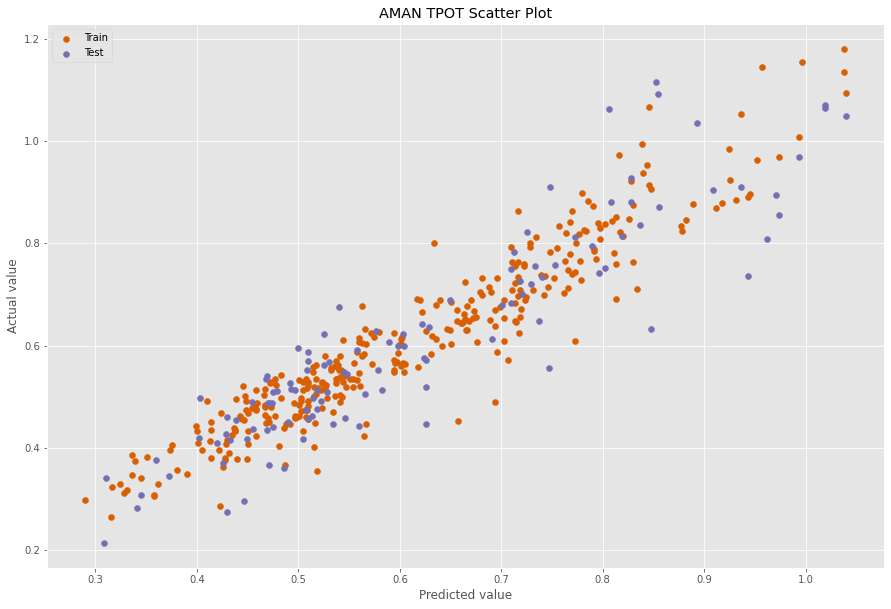

In [78]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_train, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('AMAN TPOT Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/aman_tpot_scatter.png")
plt.show()

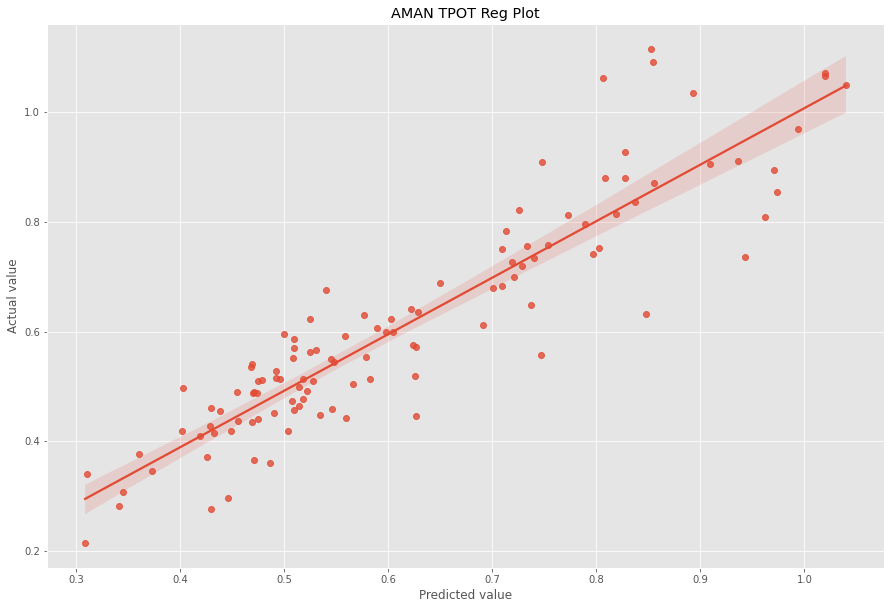

In [79]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('AMAN TPOT Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/aman_tpot_reg.png")

## 6. EvalML => AutoMLSearch

In [80]:
import evalml
from evalml import AutoMLSearch

In [81]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='regression', test_size=0.3, random_seed=0)

In [82]:
automl = AutoMLSearch(X_train = X_train, y_train=y_train, problem_type = "regression",max_batches=1,optimize_thresholds=True)
automl.search()

Parameters for components {'Baseline Classifier'} will not be used to instantiate the pipeline since they don't appear in the pipeline


In [83]:
automl.rankings

id                                      pipeline_name  search_order  \
0   3     XGBoost Regressor w/ Log Transformer + Imputer             3   
1   5  Random Forest Regressor w/ Log Transformer + I...             5   
2   2  Extra Trees Regressor w/ Log Transformer + Imp...             2   
3   7    LightGBM Regressor w/ Log Transformer + Imputer             7   
4   1  Elastic Net Regressor w/ Log Transformer + Imp...             1   
5   6  Decision Tree Regressor w/ Log Transformer + I...             6   
6   4    CatBoost Regressor w/ Log Transformer + Imputer             4   
7   0                  Mean Baseline Regression Pipeline             0   

   mean_cv_score  standard_deviation_cv_score  validation_score  \
0       0.709445                     0.041296          0.720399   
1       0.653442                     0.056816          0.701370   
2       0.633008                     0.038581          0.659227   
3       0.605237                     0.044743          0.648999   
4       0.528976                     0.011459          0.539955   
5       0.498952                     0.083633          0.589803   
6       0.109574                     0.068118          0.145946   
7      -0.029634                     0.025664         -0.000036   

   percent_better_than_baseline  high_variance_cv  \
0                   2494.042543             False   
1                   2305.058138             False   
2                   2236.103458             False   
3                   2142.390369             False   
4                   1885.043390             False   
5                   1783.725988             False   
6                    469.761223             False   
7                      0.000000             False   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3  {'Imputer': {'categorical_impute_strategy': 'm...  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6  {'Imputer': {'categorical_impute_strategy': 'm...  
7       {'Baseline Regressor': {'strategy': 'mean'}}

In [84]:
best_pipeline = automl.best_pipeline
best_pipeline

pipeline = RegressionPipeline(component_graph={'Log Transformer': ['Log Transformer', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Log Transformer.y'], 'XGBoost Regressor': ['XGBoost Regressor', 'Imputer.x', 'Log Transformer.y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'XGBoost Regressor':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1}}, random_seed=0)

In [85]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**************************************************
* XGBoost Regressor w/ Log Transformer + Imputer *
**************************************************

Problem Type: regression
Model Family: XGBoost

Pipeline Steps
1. Log Transformer
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. XGBoost Regressor
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 0.7 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.720        0.721     0.377     0.055 0.009 0.070                    0.095        208          104
1           0.664        0.664     0.293     0.050 0.010 0.075                    0.101        208          104
2           0.744        

In [86]:
automl.describe_pipeline(1)


************************************************************************
* Elastic Net Regressor w/ Log Transformer + Imputer + Standard Scaler *
************************************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Log Transformer
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Standard Scaler
4. Elastic Net Regressor
	 * alpha : 0.0001
	 * l1_ratio : 0.15
	 * max_iter : 1000
	 * normalize : False

Training
Training for regression problems.
Total training time (including CV): 0.3 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.540        0.556     0.446     0.067 0.015 0.090                    0.121        208          104
1           0.517        0.521     0.349     0.077 0.015 0.095  

In [87]:
automl.results

{'pipeline_results': {0: {'id': 0,
   'pipeline_name': 'Mean Baseline Regression Pipeline',
   'pipeline_class': evalml.pipelines.regression_pipeline.RegressionPipeline,
   'pipeline_summary': 'Baseline Regressor',
   'parameters': {'Baseline Regressor': {'strategy': 'mean'}},
   'mean_cv_score': -0.02963377133168506,
   'standard_deviation_cv_score': 0.025663757136494953,
   'high_variance_cv': False,
   'training_time': 0.04738306999206543,
   'cv_data': [{'all_objective_scores': OrderedDict([('R2',
                   -3.6130703622738736e-05),
                  ('ExpVariance', 0.0),
                  ('MaxError', 0.5072632475432692),
                  ('MedianAE', 0.12655517649999998),
                  ('MSE', 0.03203135820963962),
                  ('MAE', 0.14474829234116124),
                  ('Root Mean Squared Error', 0.1789730655982615),
                  ('# Training', 208),
                  ('# Validation', 104)]),
     'mean_cv_score': -3.6130703622738736e-05,
     'binar

In [88]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

## Graphical Representation

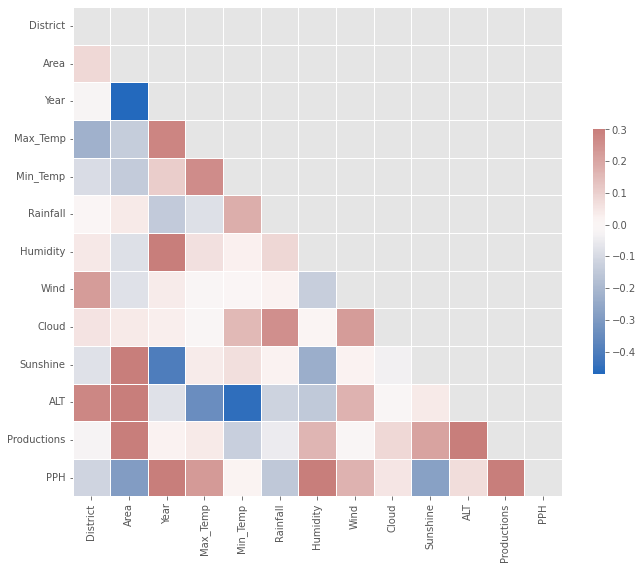

In [89]:
correlation_data=data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<Figure size 720x720 with 0 Axes>

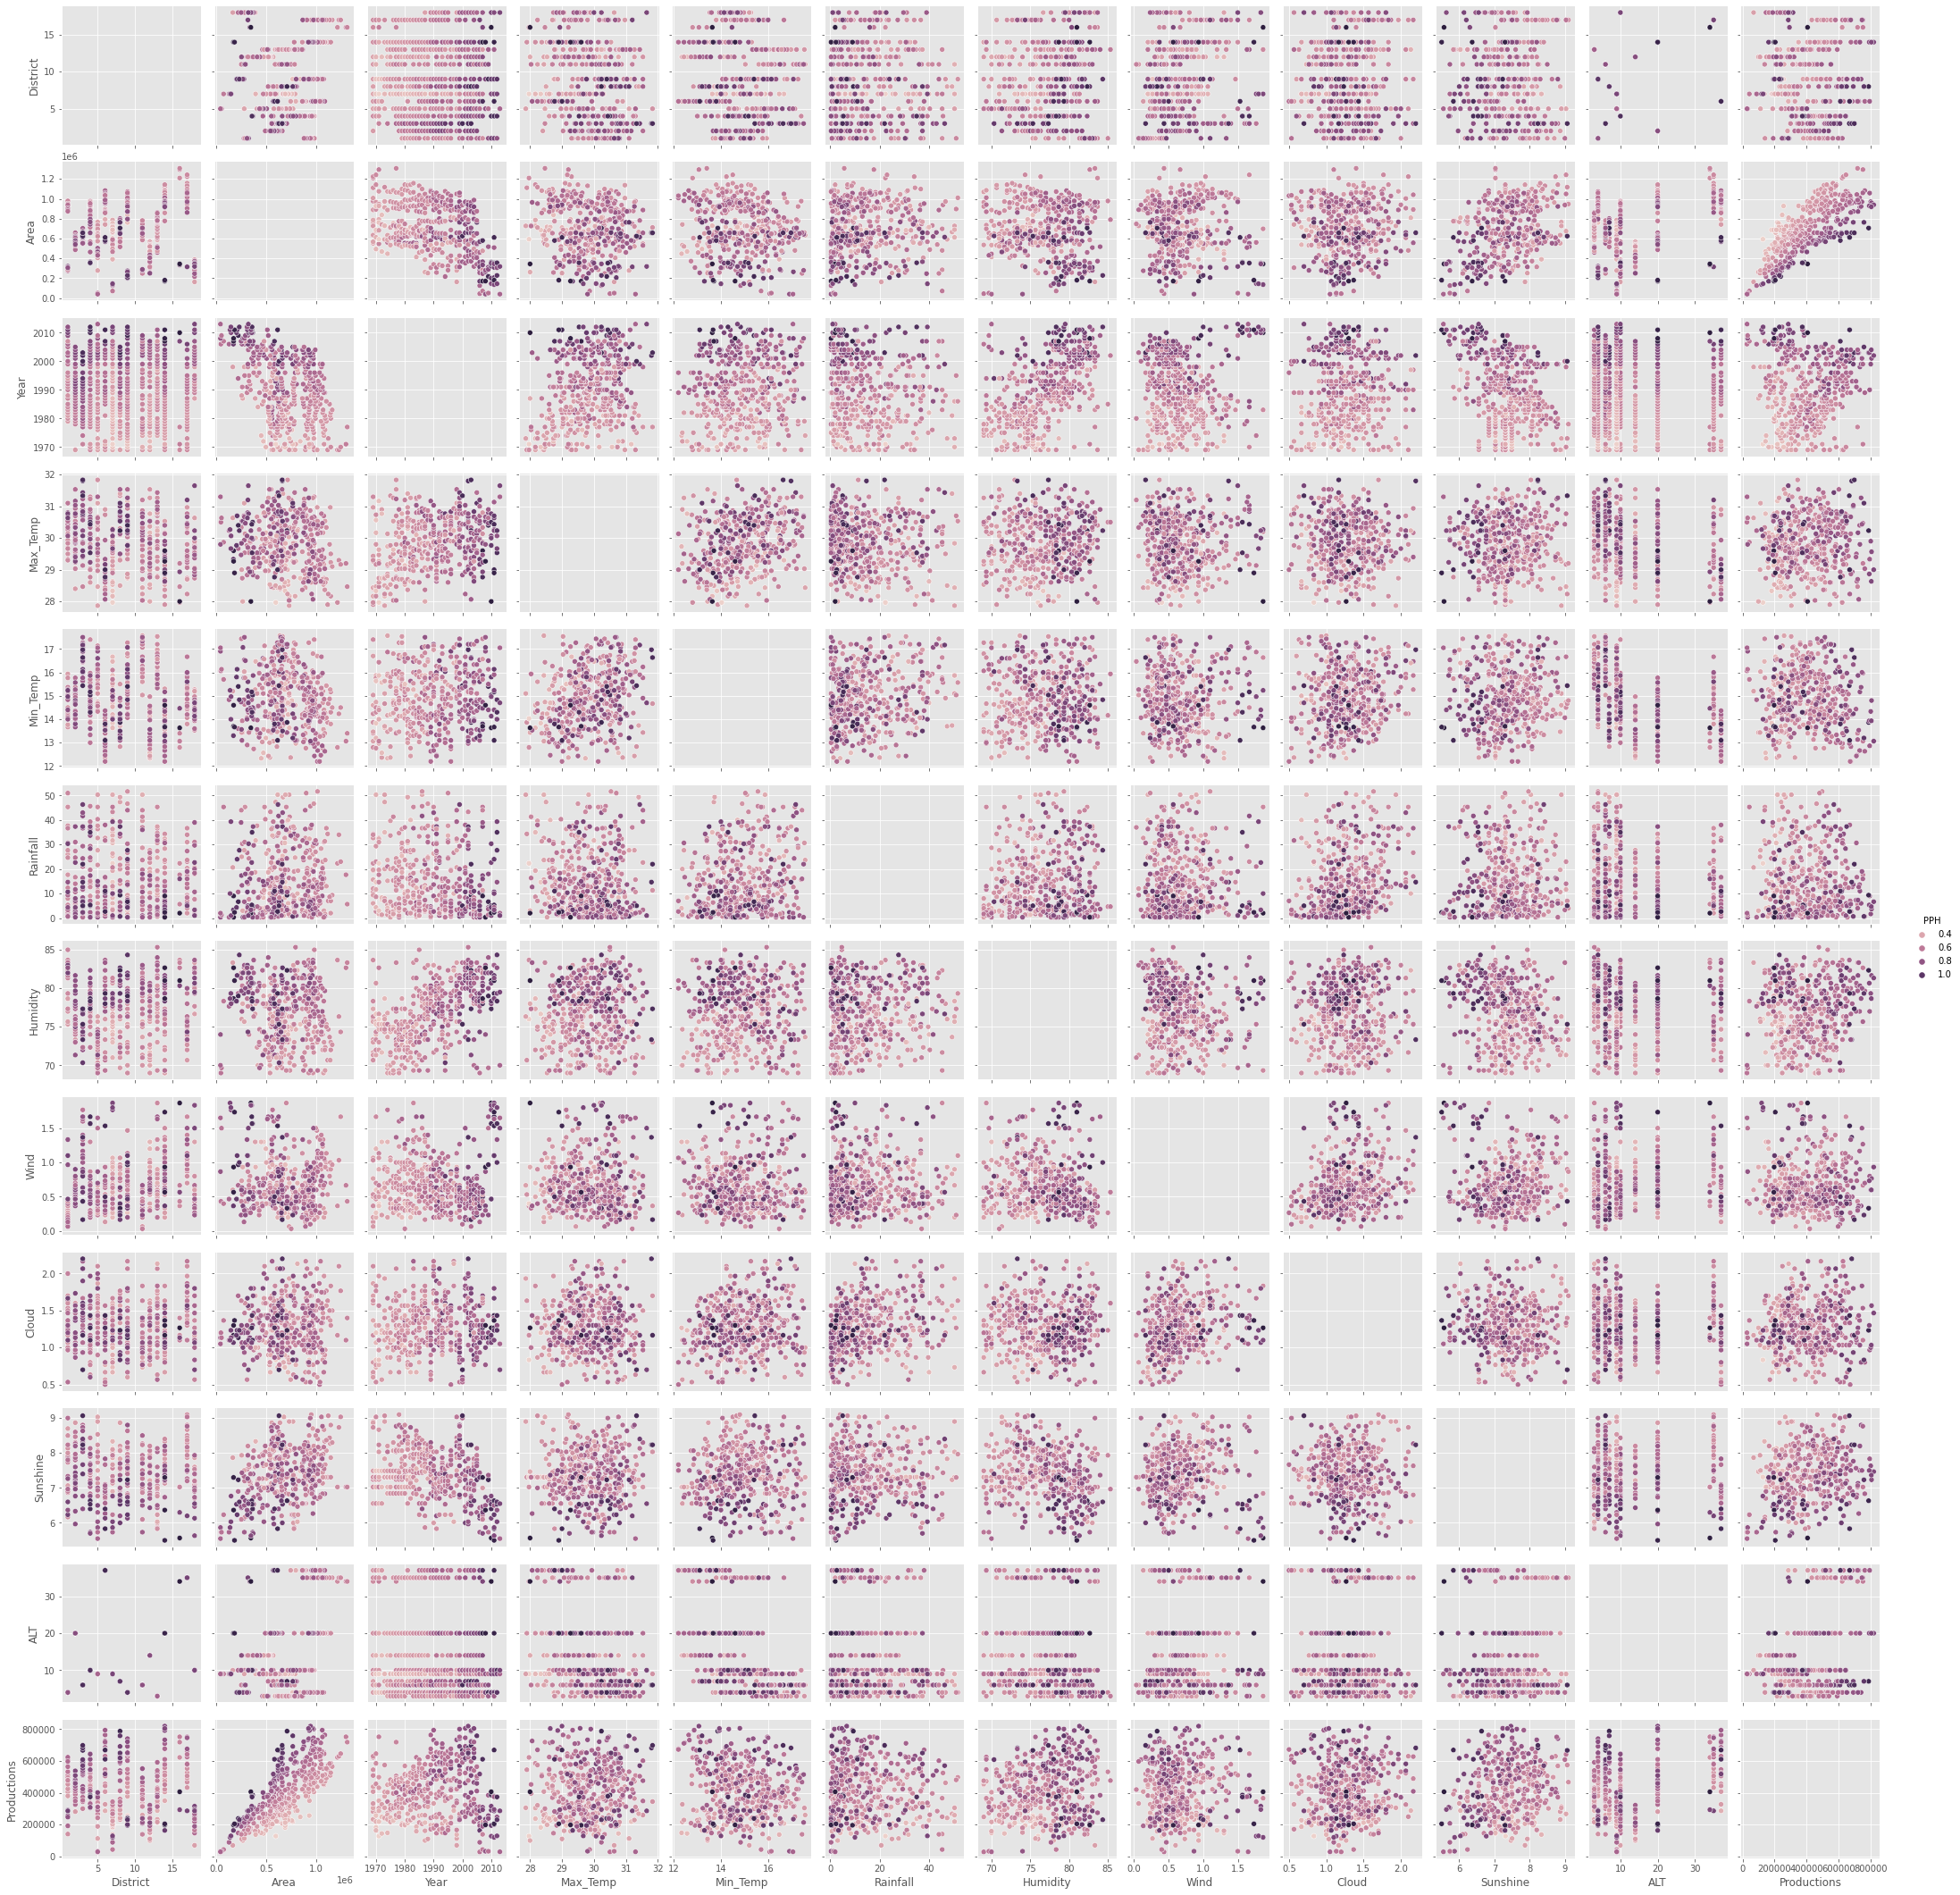

In [90]:
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue='PPH');

In [91]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "Rainfall", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [92]:
pio.templates.default = "seaborn"
plt.figure(figsize=(10, 10))
fig = px.line(data, x = "Cloud", y = "Rainfall", color = "Cloud")
fig.show()

<Figure size 720x720 with 0 Axes>

In [93]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Humidity", y = "Rainfall", color = "Humidity")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [94]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "PPH", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>